## **Golden and death Cross signals based on SMA**
---
Conditions:
*   https://www.investopedia.com/ask/answers/121114/what-difference-between-golden-cross-and-death-cross-pattern.asp
*   Cross of SMA 50 and 200

### 1. Libraries

In [1]:
#Import the libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### 2. Download the data from yahoofinance or CSV file

In [2]:
# a) Load the data from csv file
#from google.colab import files
#files.upload()

In [3]:
# b) Load the data - Pobranie danych z yahoo finance
df = yf.download("BTC-USD", start="2017-01-01", end="2022-01-01", interval = '1d')
#Set the data as the index
df.index.name = None
df['Date'] = df.index
#Show the data
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Date
2016-12-31,960.627014,963.742981,947.236023,963.742981,963.742981,99135104,2016-12-31
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008,2017-01-01
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992,2017-01-02
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000,2017-01-03
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984,2017-01-04


### 2. Simple Moving Average - SMA


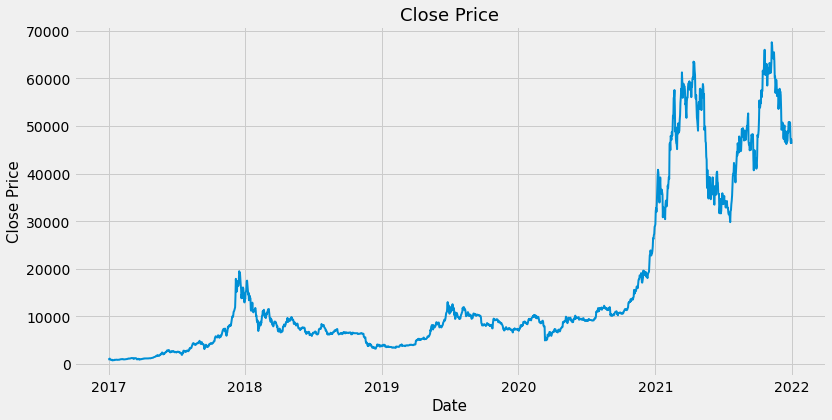

In [4]:
#Visually show and plot the close price
plt.figure(figsize=(12,6))
plt.title('Close Price', fontsize=18)
plt.plot(df['Close'],linewidth=2)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close Price', fontsize=15)
plt.show()

In [5]:
#Create a function to calculate the SMA
def SMA(data, period = 30, column='Close'):
  return data[column].rolling(window=period).mean()

In [6]:
#Create two new columns to store the 50 day and 200 day SMA
df['SMA50'] = SMA(df, 50)
df['SMA200'] = SMA(df, 200)

### 3. Golden and Death Cross

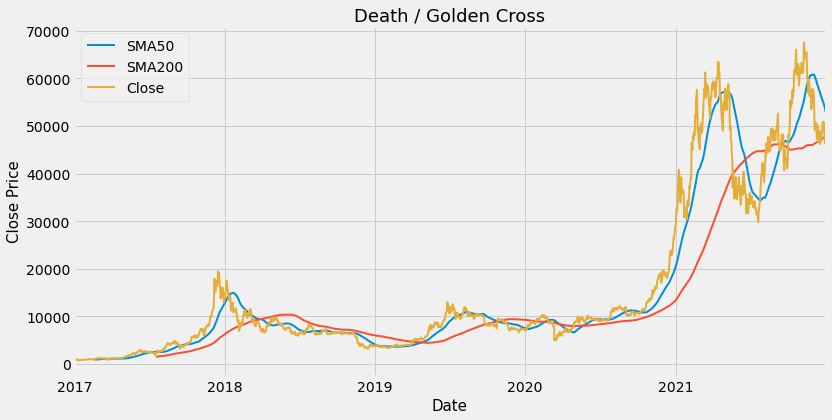

In [7]:
#Visually show and plot the SMA with Close price
column_list = ['SMA50', 'SMA200', 'Close']
df[column_list].plot(figsize=(12,6), linewidth=2)
plt.title('Death / Golden Cross', fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close Price', fontsize=15)
plt.show()

In [8]:
# Create a function to see the dates of each Death and Golden cross within the data set
def death_golden_cross():
  first_cross = 0
  
  for i in range(0, len(df)):
    if df['SMA50'][i] < df['SMA200'][i] and first_cross == 0:
      print('Death cross on day', df.index[i], ': Expect the price to continue to fall')
      first_cross = 1
    elif df['SMA50'][i] > df['SMA200'][i] and first_cross == 1:
      print('Golden cross on day', df.index[i], ': Expect the price to continue to rise')
      first_cross = 0

In [9]:
#Show the dates of each death cross and golden cross
death_golden_cross()

Death cross on day 2018-03-30 00:00:00 : Expect the price to continue to fall
Golden cross on day 2019-04-24 00:00:00 : Expect the price to continue to rise
Death cross on day 2019-10-26 00:00:00 : Expect the price to continue to fall
Golden cross on day 2020-02-19 00:00:00 : Expect the price to continue to rise
Death cross on day 2020-03-25 00:00:00 : Expect the price to continue to fall
Golden cross on day 2020-05-21 00:00:00 : Expect the price to continue to rise
Death cross on day 2021-06-19 00:00:00 : Expect the price to continue to fall
Golden cross on day 2021-09-15 00:00:00 : Expect the price to continue to rise
